Text(0.5, 1.0, "Efficacy ratings for RK4 on y'=0.5y")

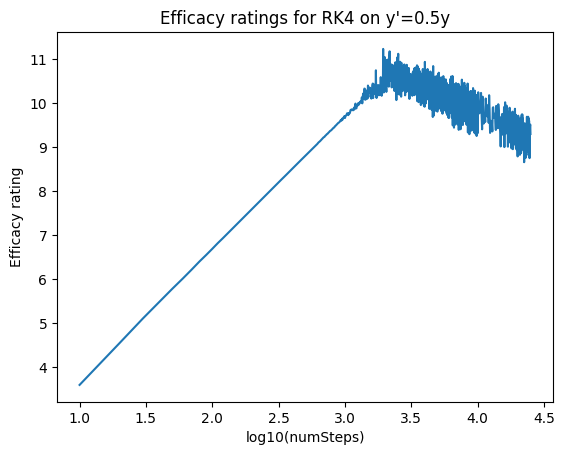

In [1]:
"""
RK4 EFFICACY ANALYSIS

This program plots various values of efficacy against the
step size used to determine that value for the RK4 numerical method.

Input values that can be changed are the function and its solution,
the interval, and the max number of steps evaluated by the program.

With the default values, this should take around 30 seconds to run.

@author     braden schleip
"""


import numpy as np
import matplotlib.pyplot as plt


################# INPUT VALUES #################

lowerBound = 0
upperBound = 3
maxNumSteps = 25000

lam = 0.5
def f(x,y):                                  
    return lam * y
def y_exact(x): 
    return np.exp(lam * x)


############## CREATING THE DATA ###############

steps = []      # records the number of steps per iteration
efficacies = [] # records the efficacy per iteration
n = 10          # value that determines the number of steps

while n <= maxNumSteps:
    
    # determining h (step size) value
    numSteps = n
    h = (upperBound - lowerBound) / numSteps

    # initial x and y values
    x = lowerBound
    y = y_exact(lowerBound) 

    functionEvals = 0
    yVals = [y]

    # running the RK4 method
    while x <= upperBound:

        k1 = f(x,y)
        k2 = f(x+h/2, y+h/2*k1)
        k3 = f(x+h/2, y+h/2*k2)
        k4 = f(x+h, y+h*k3)

        functionEvals += 4  # from each k value
        y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
        x += h

        yVals.append(y)

    # determining the efficacy
    avgError = 0
    avgCount = 0
    for n in range(0, numSteps+1):

        # finding the true error value
        eVal = np.abs( y_exact(lowerBound + h*n) - yVals[n] )

        # if we don't filter, we will get inf for our efficacy term.
        if eVal > 10**-20:
            avgError += np.log10(eVal)
            avgCount += 1
    
    # efficacy is the average error + log( function evals )
    efficacy = -(avgError/avgCount + np.log10(functionEvals))

    efficacies.append(efficacy)
    steps.append(np.log10(numSteps))

    # After a step count of 10000, increase the interval
    # to expedite program runtime.
    if n < 10000:
        n += 10
    else:
        n += 100


############### PLOTTING THE DATA ##############

plt.plot(steps, efficacies)
plt.xlabel("log10(numSteps)")
plt.ylabel("Efficacy rating")
plt.title("Efficacy ratings for RK4 on y'="+str(lam)+"y")